* <h3>Import Library functions</h3>

In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

* <h3>Import Dataset using Pandas </h3>

In [219]:
df=pd.read_csv('Country-data.csv')

* <h3> Check shape of dataset</h3>

In [220]:
df.shape

(167, 10)

-> 167 rows and 10 column

* <h3> Get information about dataset such as mean and standard deviation using Pandas describe method </h3>

In [221]:
df.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [223]:
df.head(10)

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
5            Argentina        14.5     18.9    8.10     16.0   18700   
6              Armenia        18.1     20.8    4.40     45.3    6700   
7            Australia         4.8     19.8    8.73     20.9   41400   
8              Austria         4.3     51.3   11.00     47.8   43200   
9           Azerbaijan        39.2     54.3    5.88     20.7   16000   

   inflation  life_expec  total_fer   gdpp  
0      9.440        56.2       5.82    553  
1      4.490        76.3       1.65   4090  
2     16.100        76.5       2.89   4460  
3     22.400        60.1       6.16   3530  
4      1.440        76.8       2.13  12200  
5     20.900        75.8       2.37  10300  
6      7.770        73.3       1.69   3220  
7      1.160        82.0       1.93  51900  
8      0.873        80.5       1.44  46900  
9     13.800        69.1       1.92   5840

In [224]:
d=df.drop(['country'],axis=1)

* <h3>Check for null values in dataset </h3>

In [225]:
df_value_counts = d[d.isin(['?', '-','nan',None])].stack().value_counts()
print(df_value_counts)

Series([], Name: count, dtype: int64)


-> No null values in dataset, therefore no need to handle null values

* <h3> Histograms for each attribute</h3>

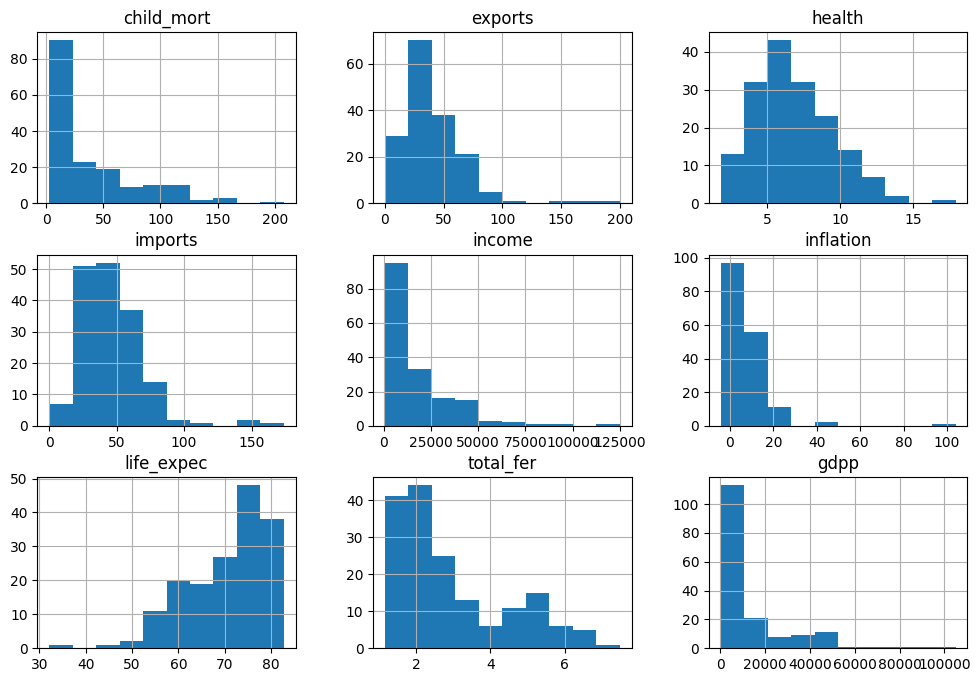

In [226]:
d.hist(figsize=(12, 8))
plt.show()

* <h3> Box and whisker plots for each attribute</h3>

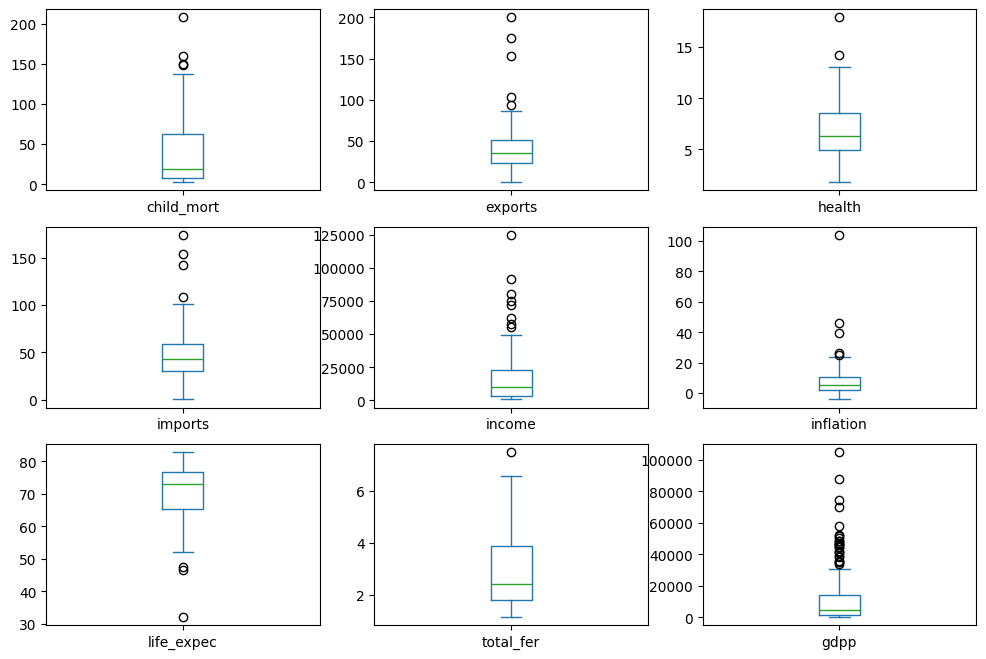

In [227]:
d.plot(kind='box', subplots=True, layout=(d.shape[1]//3,3), figsize=(12, 8))
plt.show()

* <h3> Correlation matrix</h3>

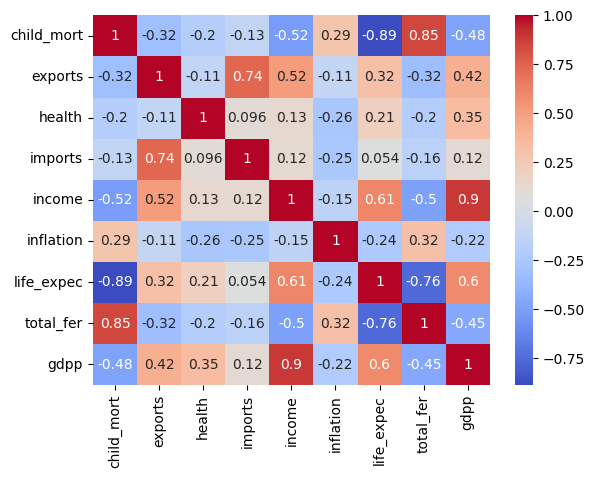

In [228]:
corr_matrix = d.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

* <h3> Pair Plot</h3>

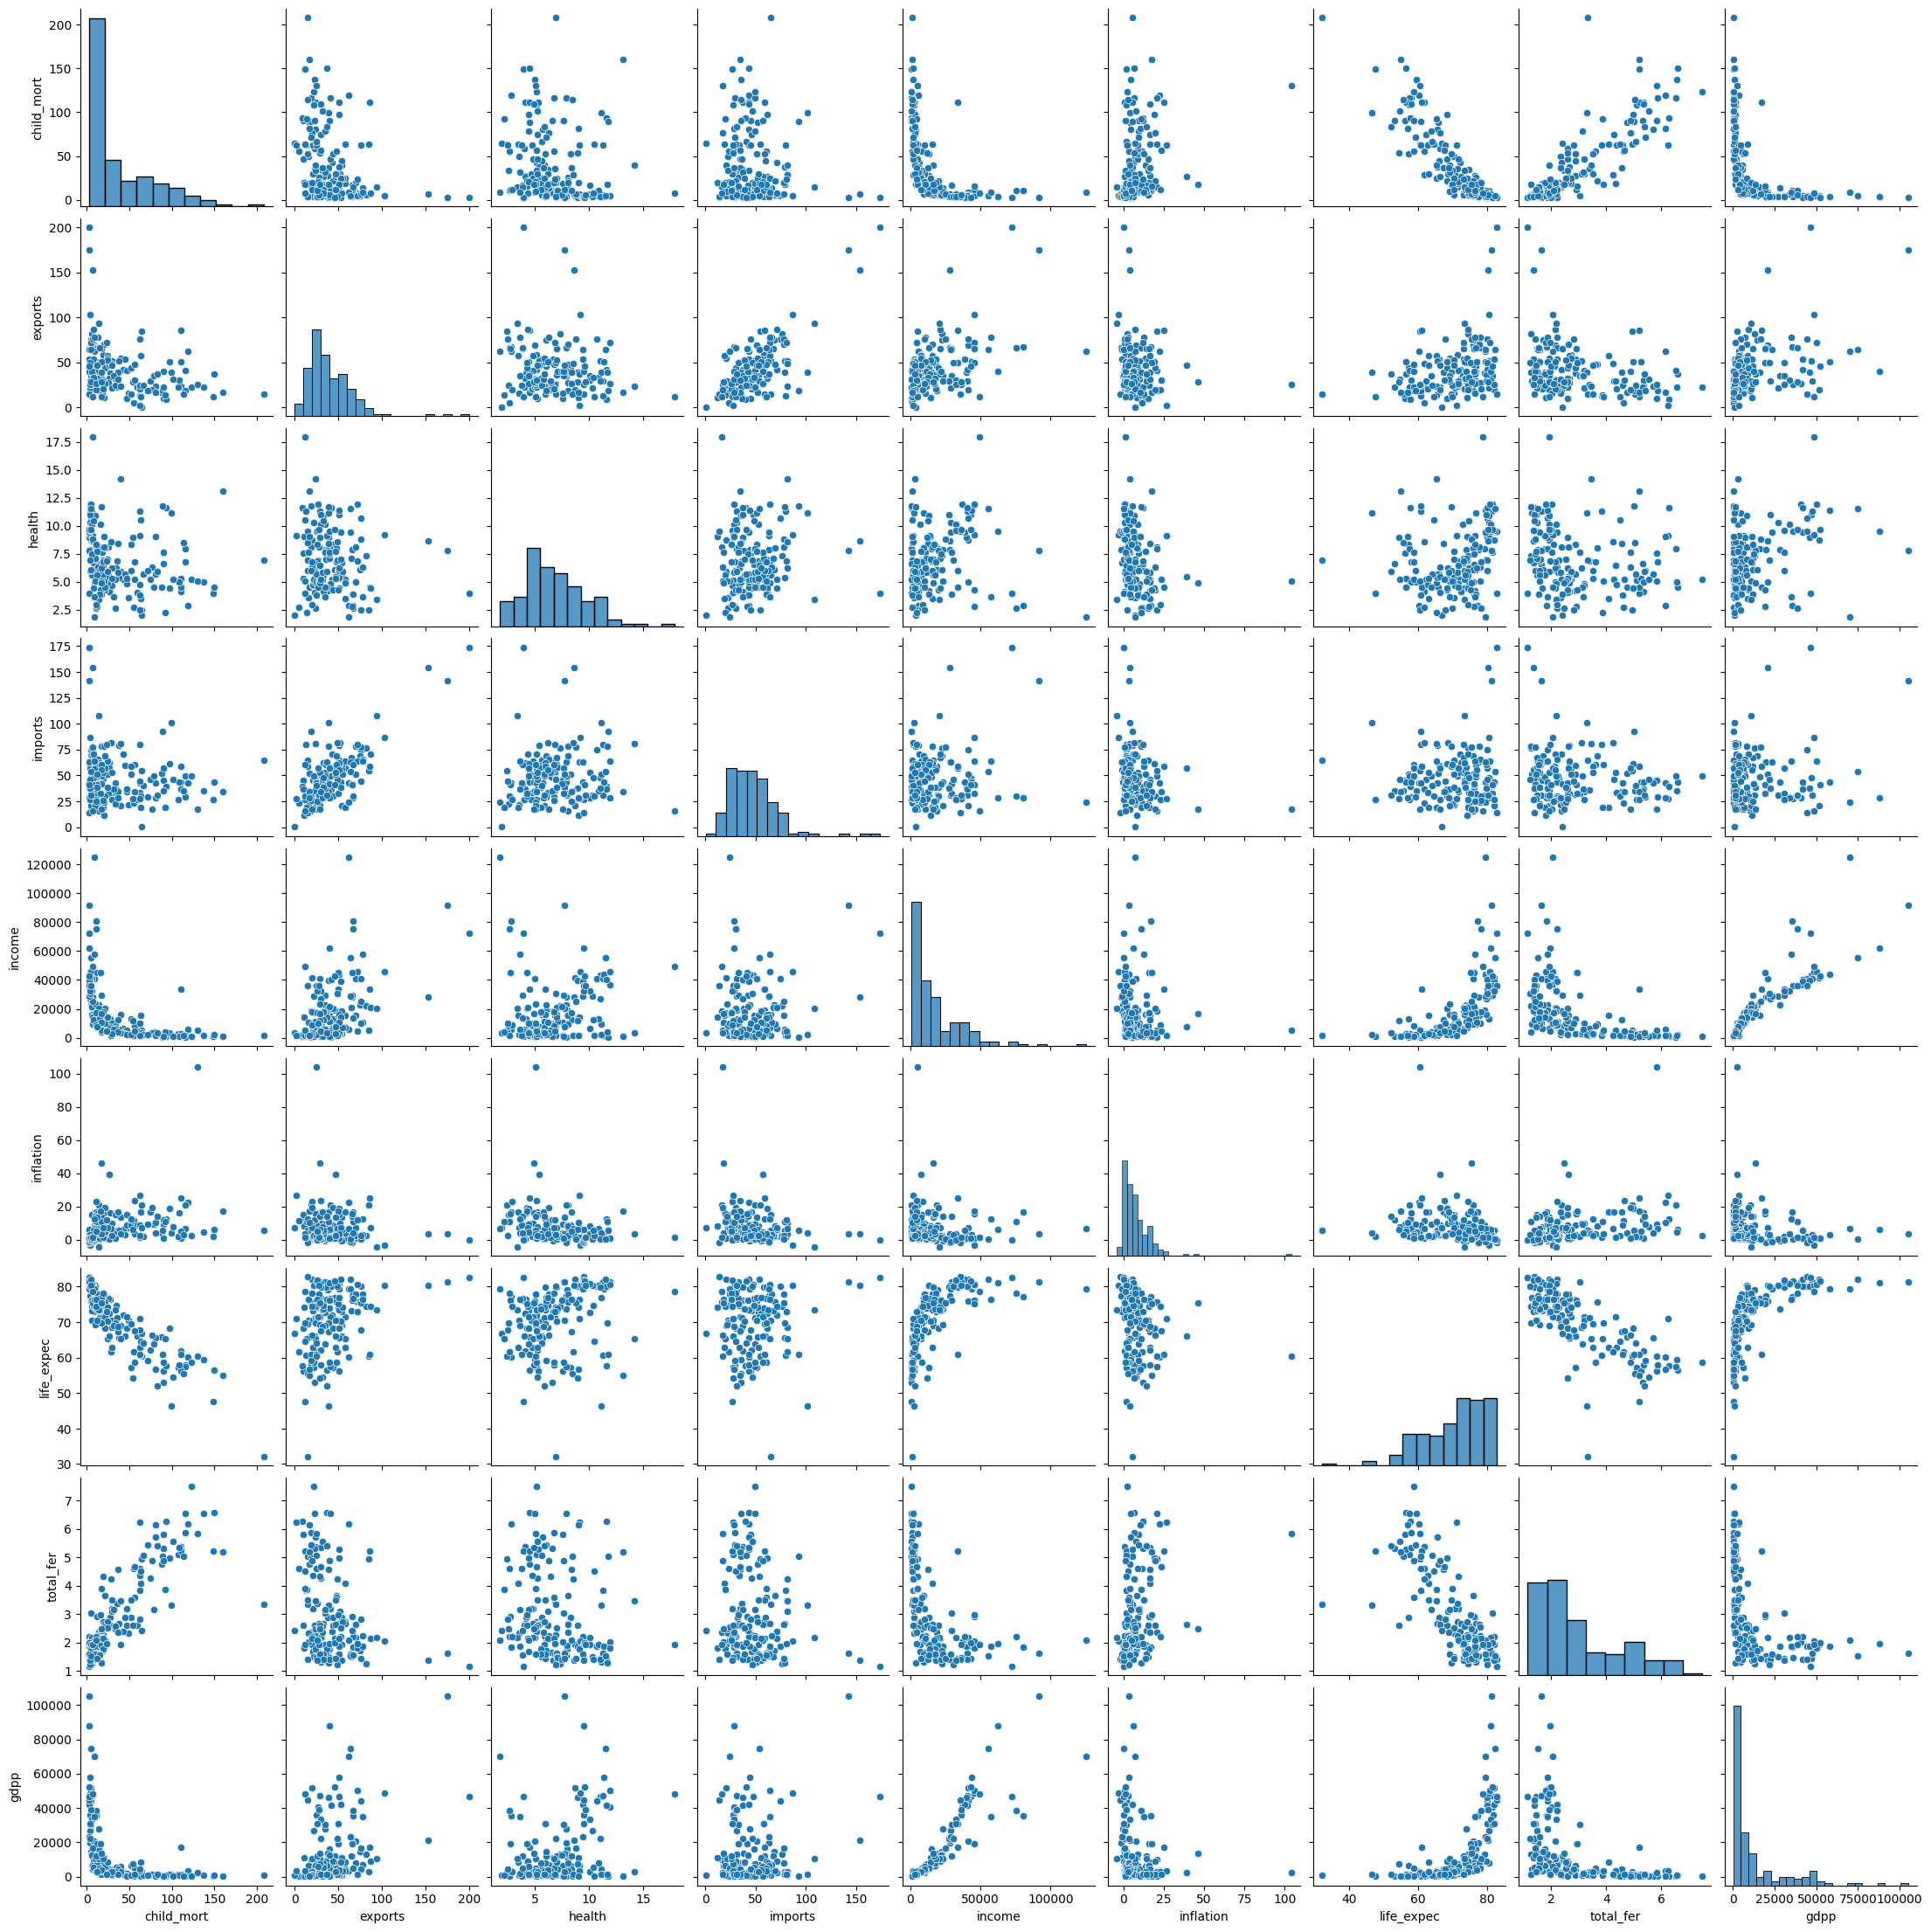

In [229]:
sns.pairplot(d)
plt.show()

* <h3> Scale data using Standard Scaler </h3>

In [230]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(d)

* <h3> Implement PCA</h3>

In [231]:
pca = PCA()
data_pca = pca.fit_transform(data_scaled)

* <h3> Scatter plot</h3>

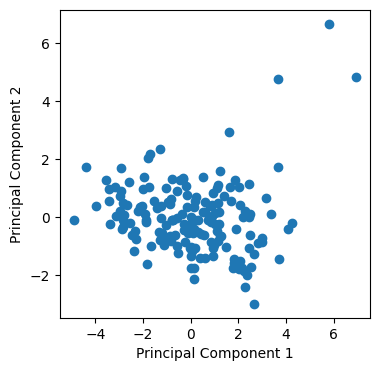

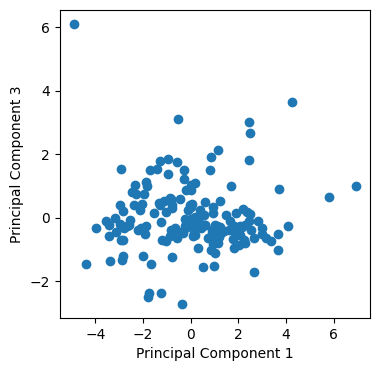

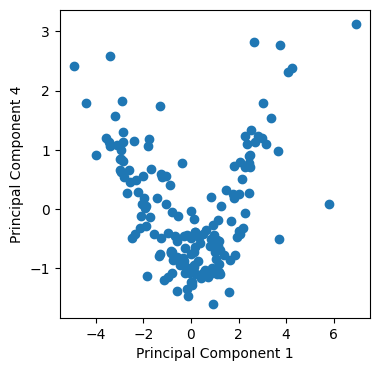

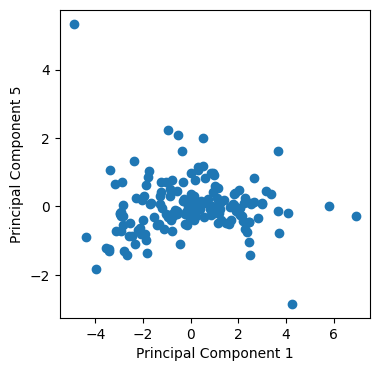

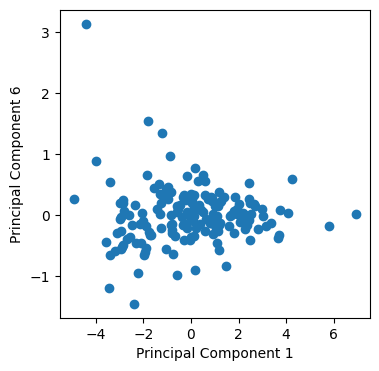

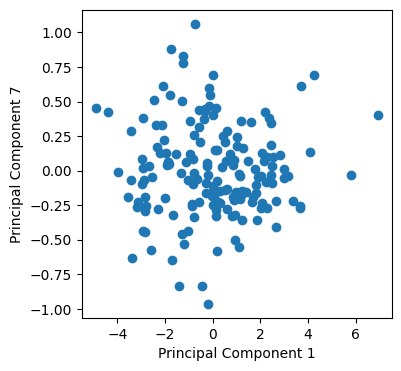

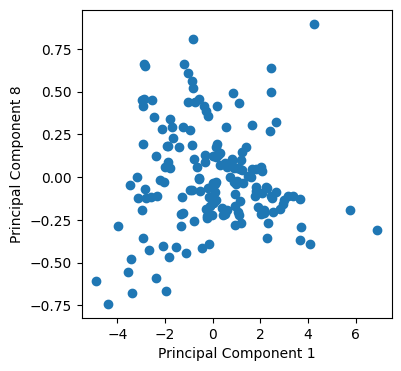

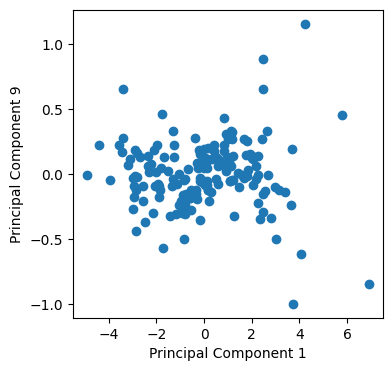

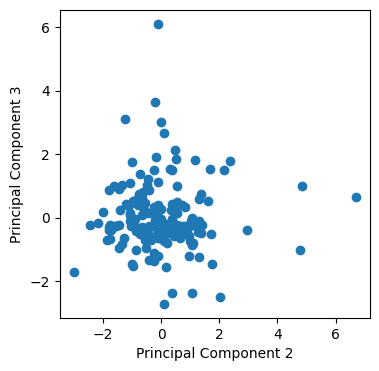

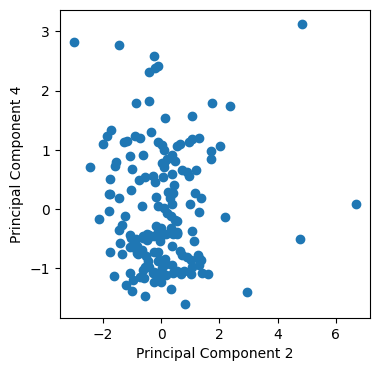

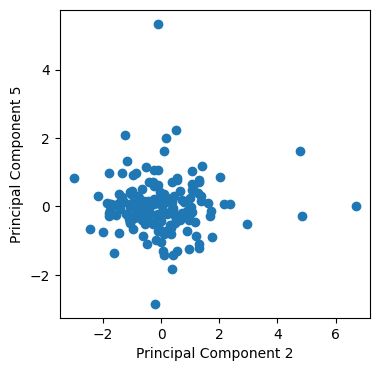

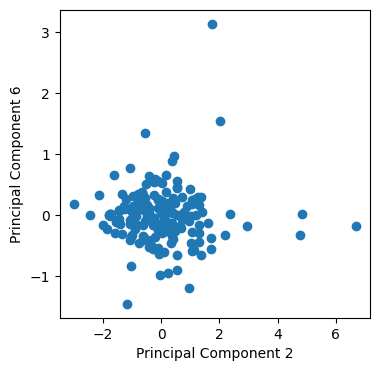

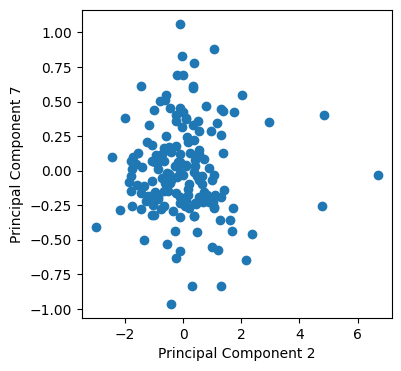

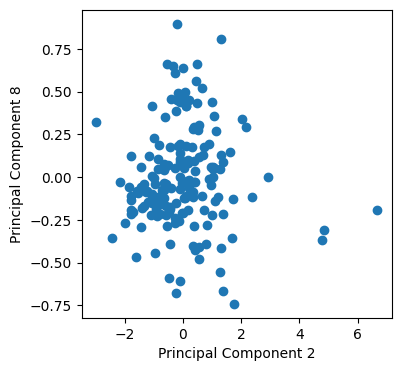

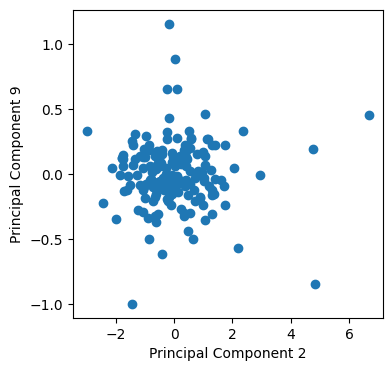

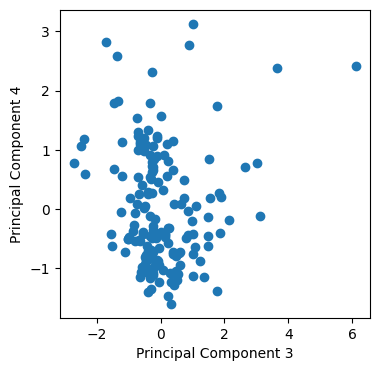

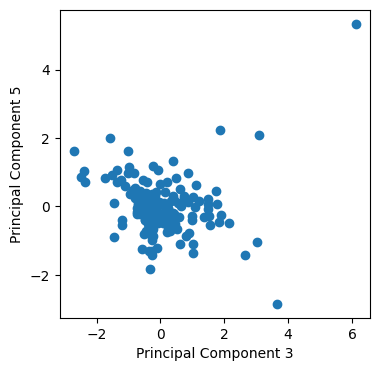

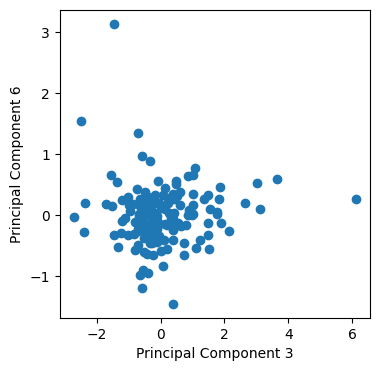

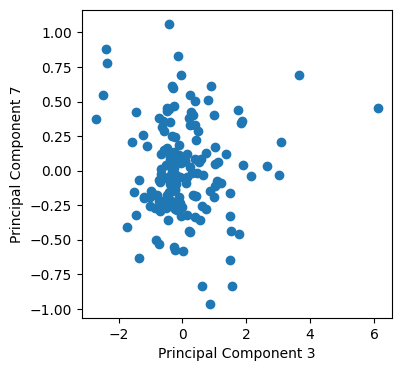

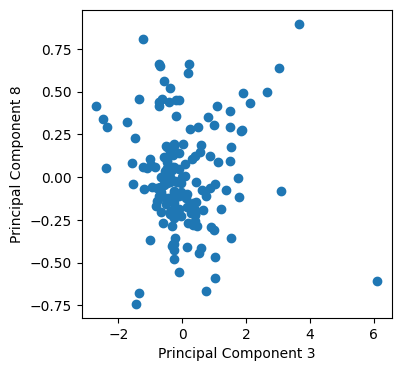

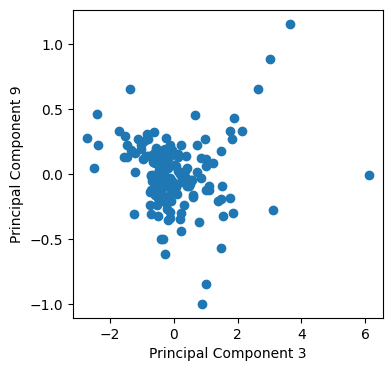

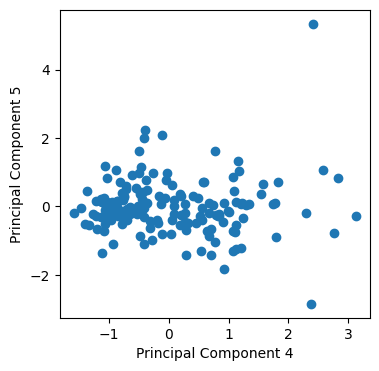

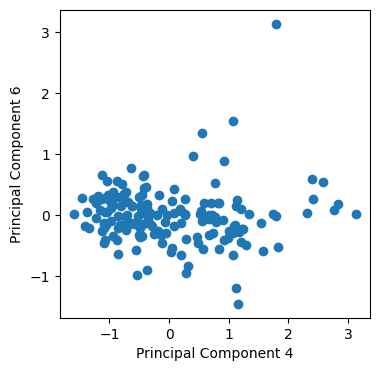

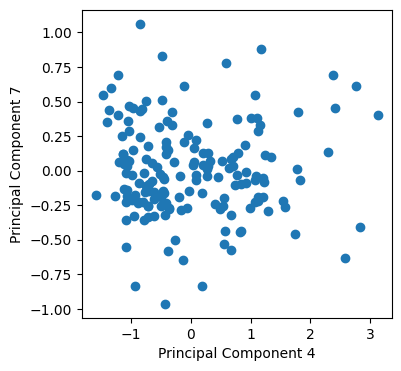

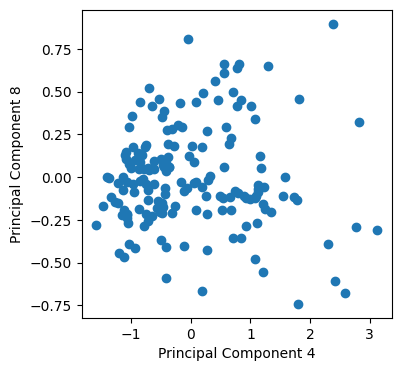

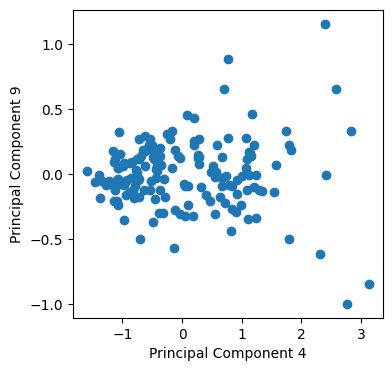

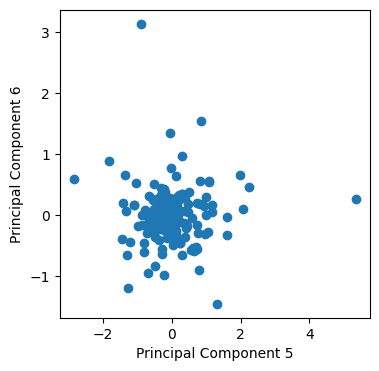

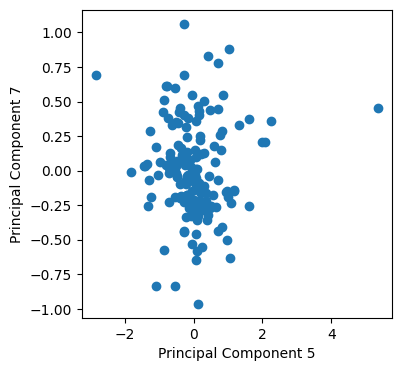

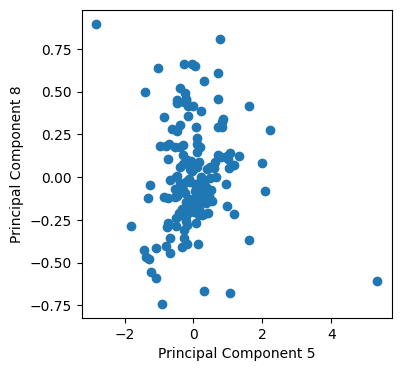

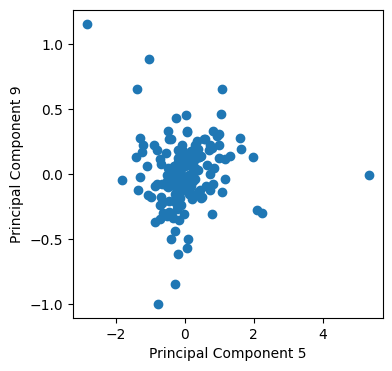

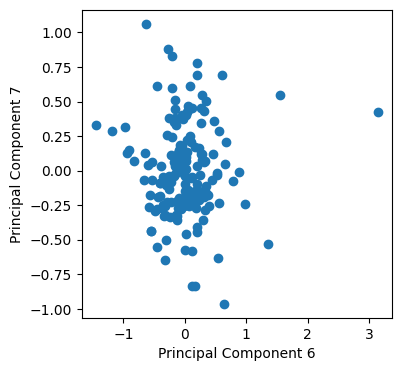

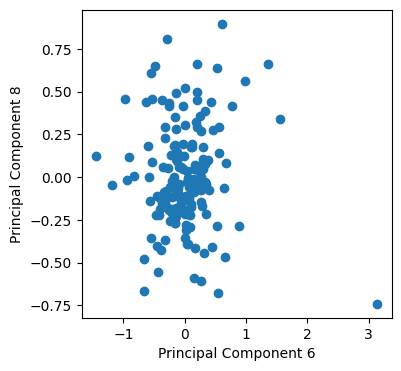

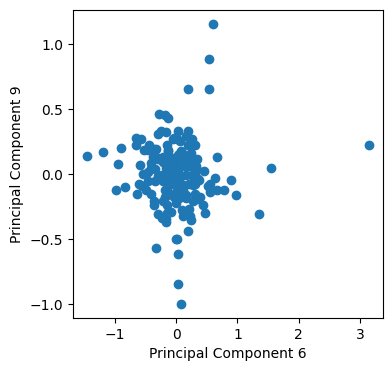

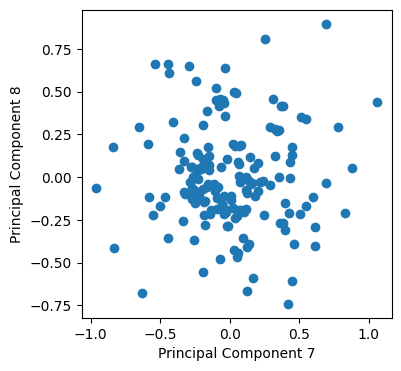

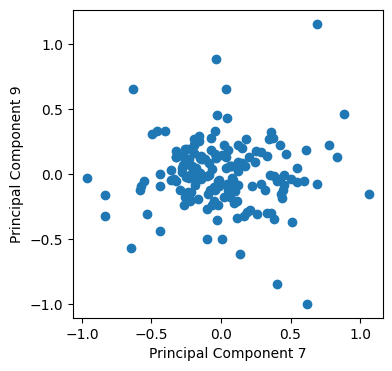

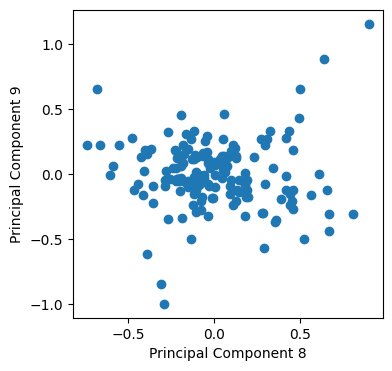

In [232]:
# Convert the PCA-transformed data to a DataFrame
data_pca_df = pd.DataFrame(data_pca, columns=[f'PC{i+1}' for i in range(data_pca.shape[1])])
n_components=data_pca_df.shape[1]
# Create a scatter plot for each pair of principal components
for j in range(n_components-1):
    for k in range(j+1, n_components):
        plt.figure(figsize=(4, 4))
        plt.scatter(data_pca_df.iloc[:, j], data_pca_df.iloc[:, k])
        plt.xlabel(f'Principal Component {j+1}')
        plt.ylabel(f'Principal Component {k+1}')
        plt.show()


* <h3> Heatmap for PCA</h3>

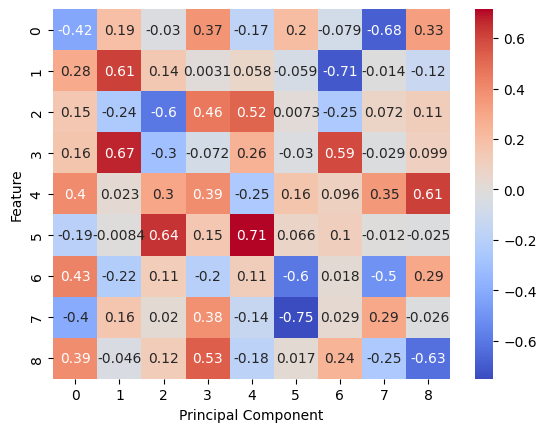

In [233]:
loadings = pca.components_.T
sns.heatmap(loadings, annot=True, cmap='coolwarm')
plt.xlabel('Principal Component')
plt.ylabel('Feature')
plt.show()

* <h3> Determine the optimal number of principal components</h3>

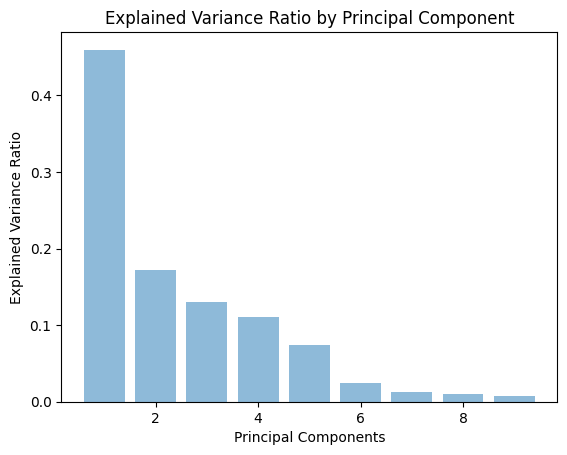

In [234]:
# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

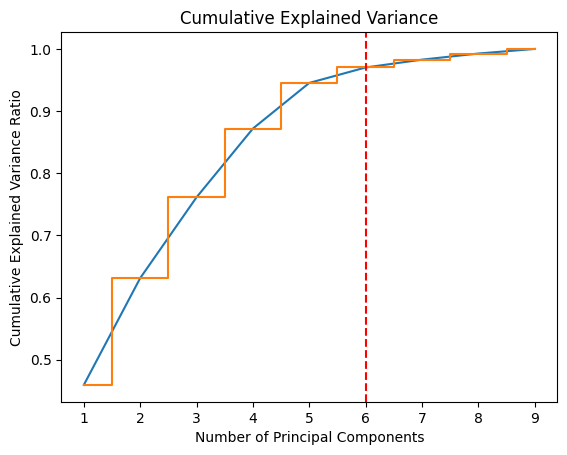

In [235]:
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.step(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, where='mid')
# Highlight the point where you achieve 95% variance
required_variance = 0.95
n_components_required = np.argmax(explained_variance_ratio >= required_variance) + 1
plt.axvline(x=n_components_required, color='r', linestyle='--', label=f'{required_variance * 100}% variance')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()


* <h3> Choose the optimal number of principal components and apply PCA</h3>

In [236]:
# 0 based indexing in arrays hence +1 is to be used
optimal_pca = PCA(n_components=n_components_required)
data_pca = optimal_pca.fit_transform(data_scaled)

In [237]:
data_pca.shape

(167, 6)

<h3> Apply K-Means Clustering To Find Optimal Number Of Clusters</h3>


In [238]:
# Array to score elbow values
elbow_val = []
# Array to store silhouette coefficients
silhouette = []
# Number of clusters to try out
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(data_pca)
    
    elbow_val.append(kmeans.inertia_)
    silhouette.append(silhouette_score(data_pca, kmeans.labels_))


/home/deepanshu/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/deepanshu/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/deepanshu/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/home/deepanshu/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/deepanshu/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/deepanshu/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/deepanshu/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 1

* <h3> Plotting the results of the elbow method And Silhouette Method </h3>

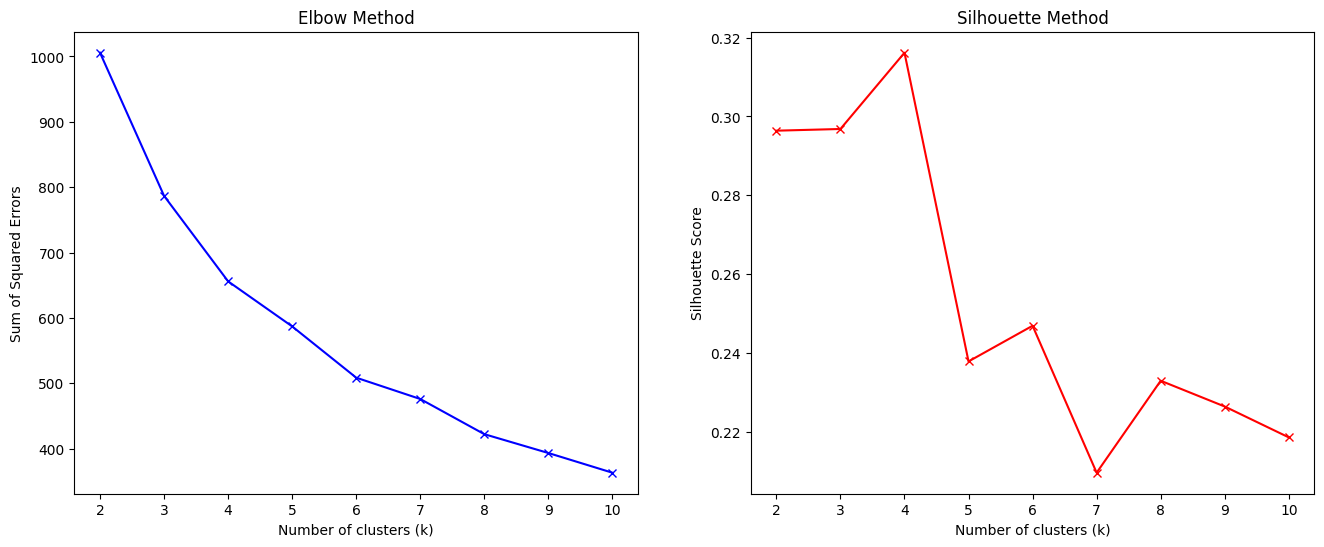

In [239]:

plt.figure(figsize=(16,6))
plt.subplot(121)
plt.plot(K, elbow_val, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors')
plt.title('Elbow Method')

plt.subplot(122)
plt.plot(K, silhouette, 'rx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

*  To determine the optimal number of clusters, we look for the “elbow point” where the rate of decrease sharply shifts, and the silhouette score is at its maximum.

In [240]:
# Choose the optimal number of clusters from graph and apply K-Means
optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k,n_init=10,random_state=42)
kmeans.fit(data_pca)


KMeans(n_clusters=6, n_init=10, random_state=42)

* <h3> Plot the clusters on a 2D scatter plot</h3>

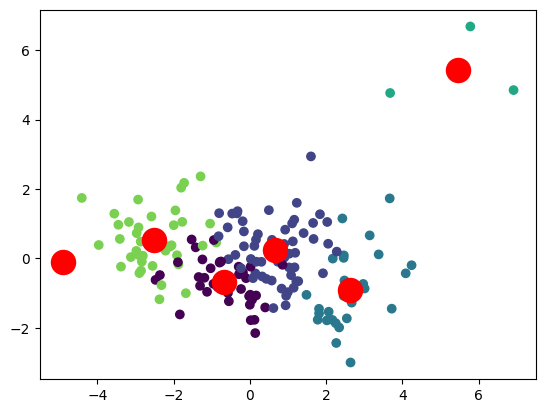

In [241]:
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()


* <h3> Perform an analysis of the clusters</h3>

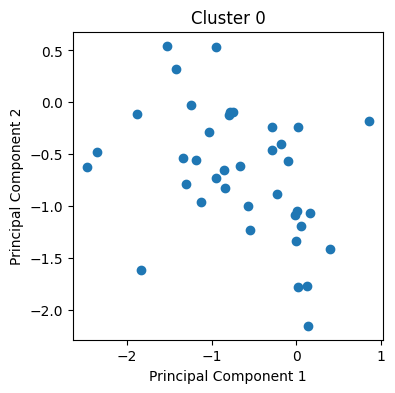

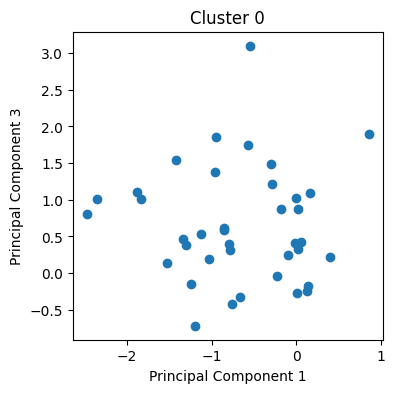

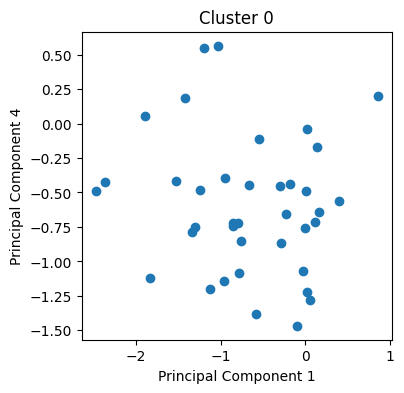

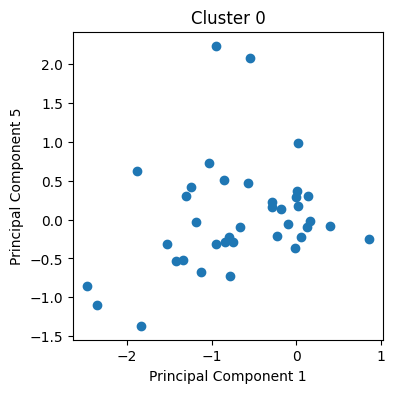

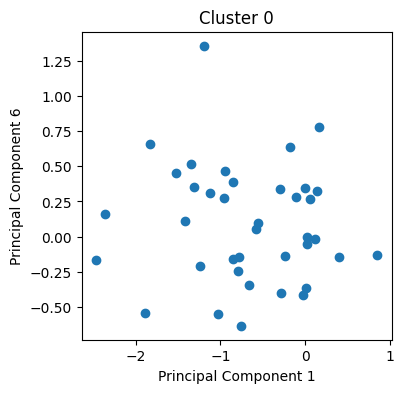

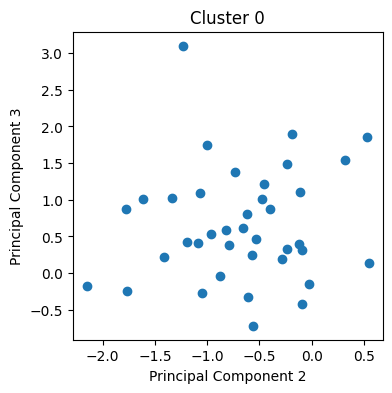

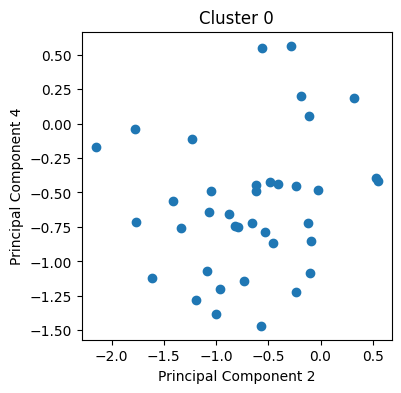

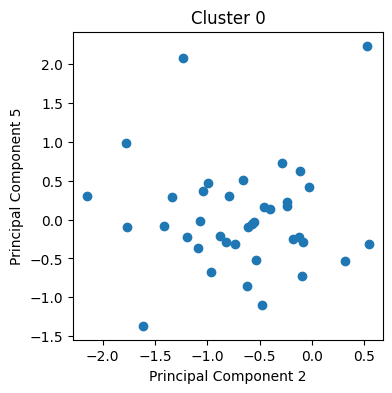

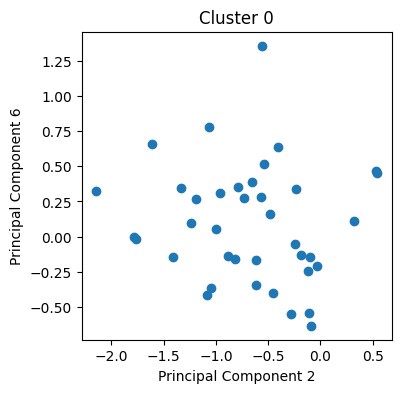

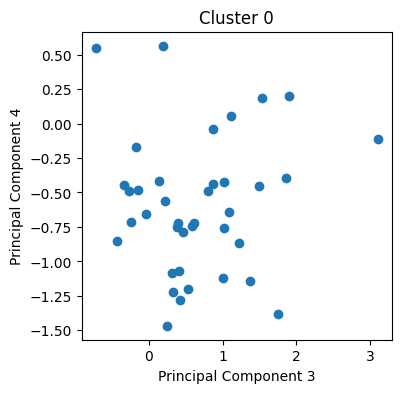

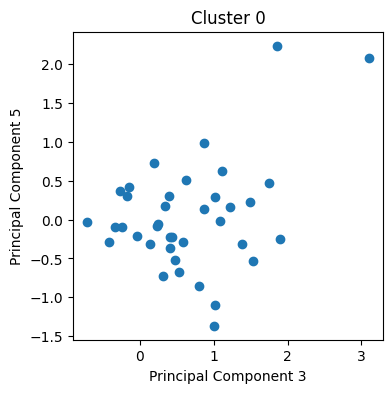

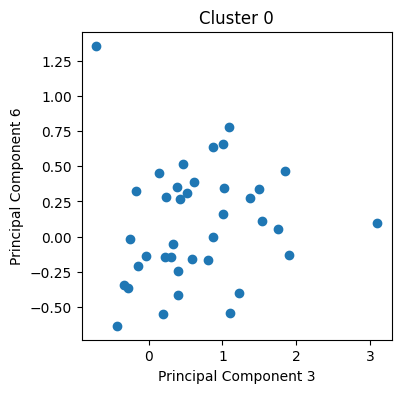

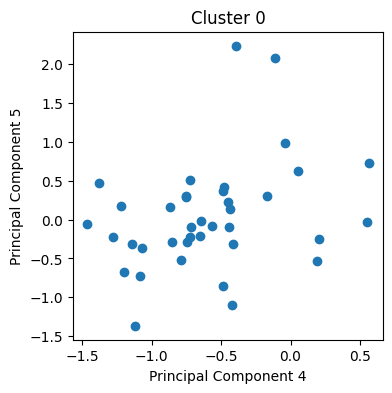

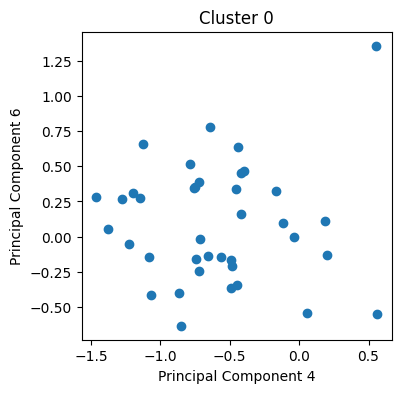

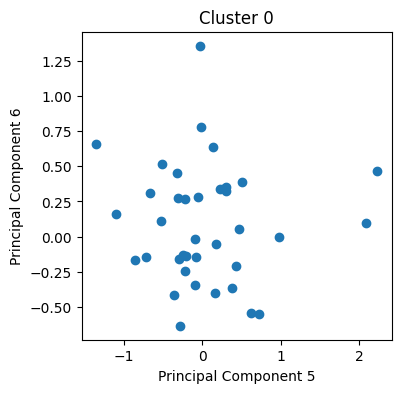

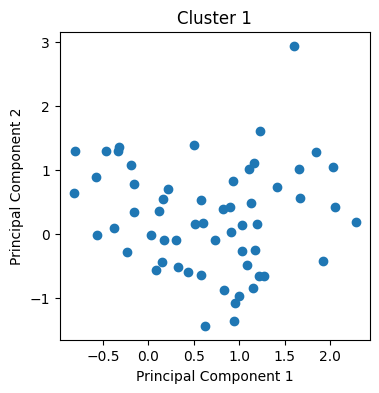

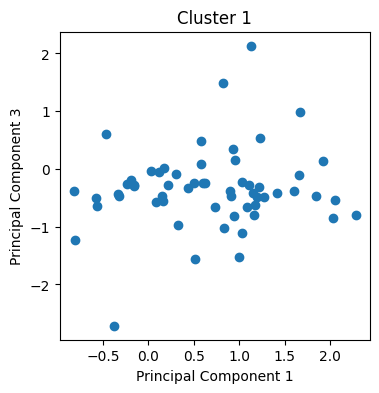

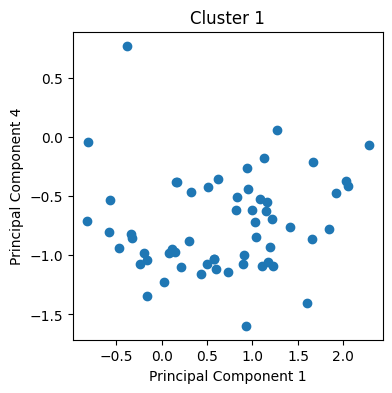

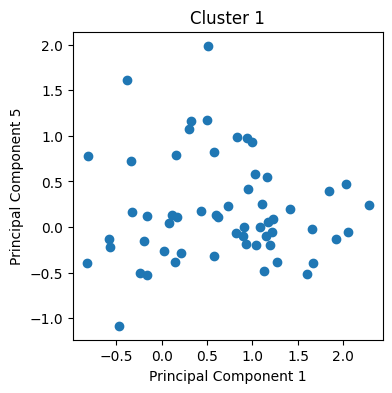

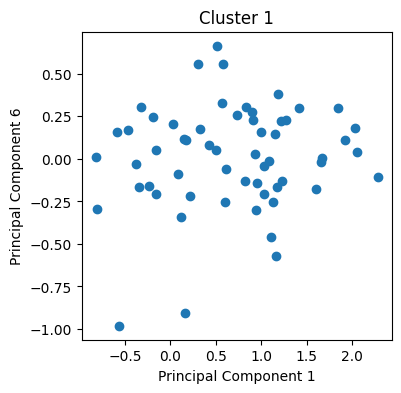

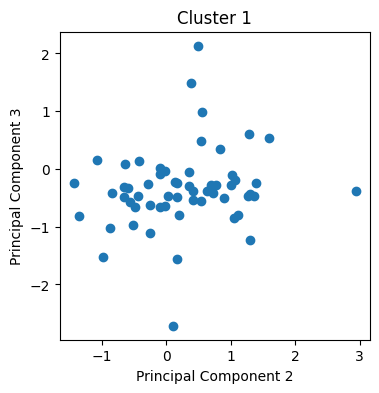

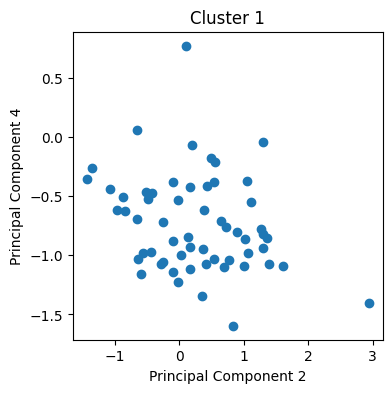

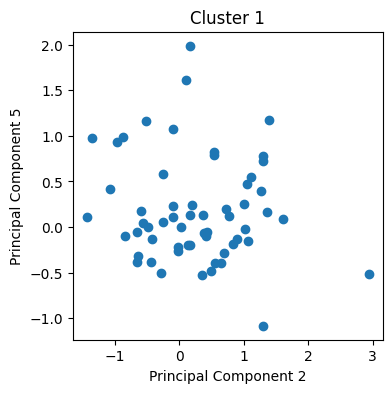

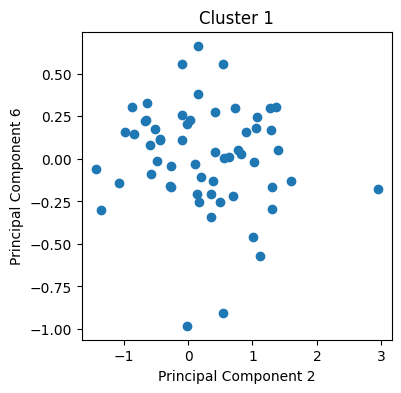

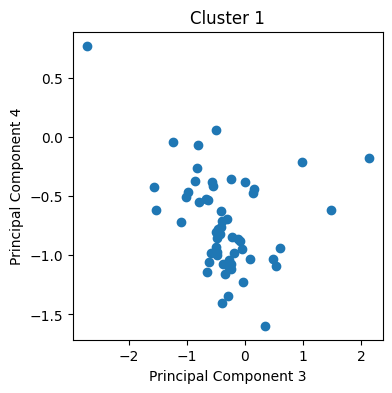

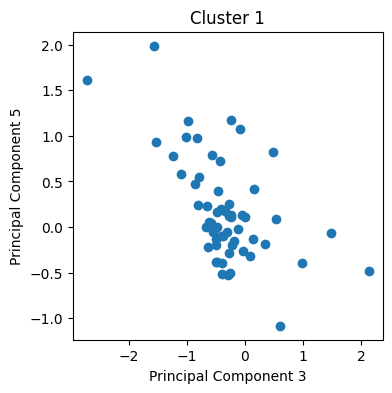

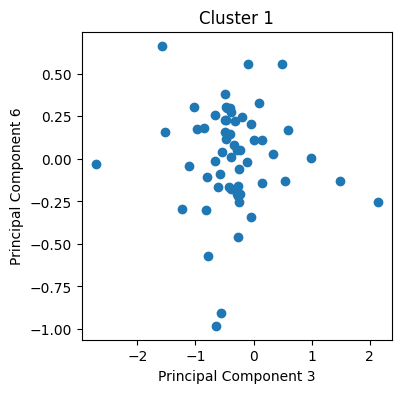

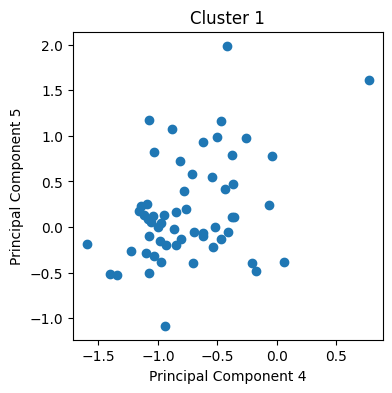

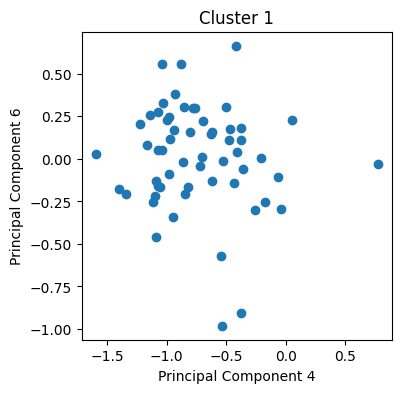

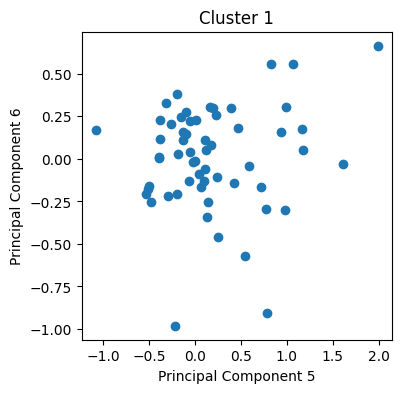

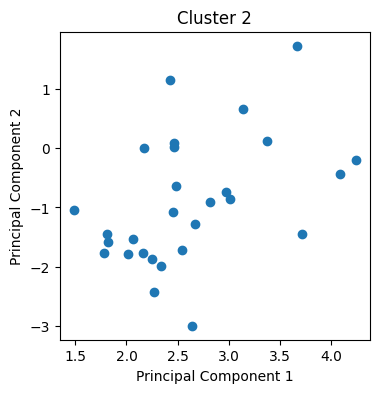

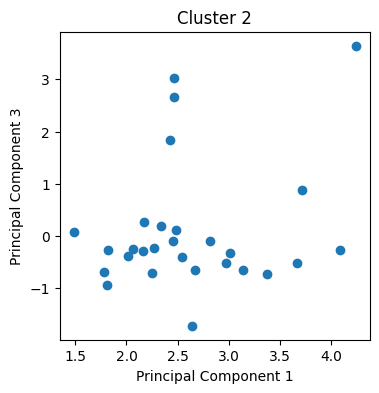

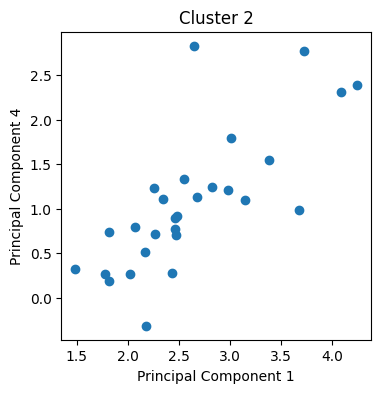

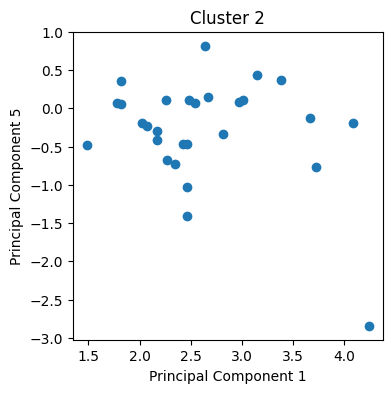

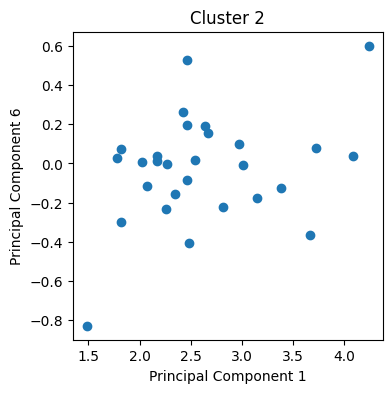

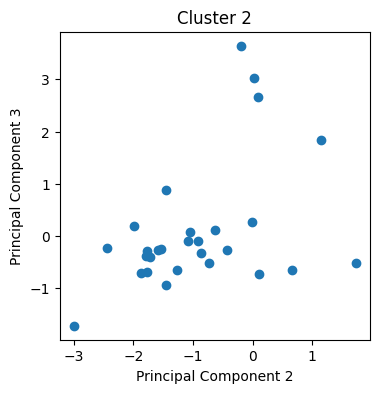

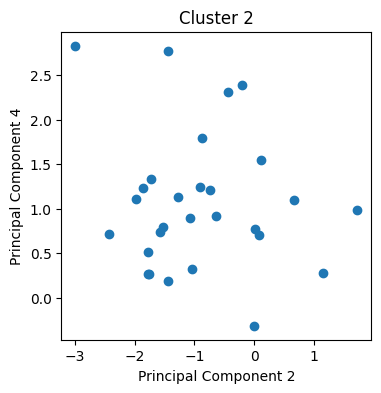

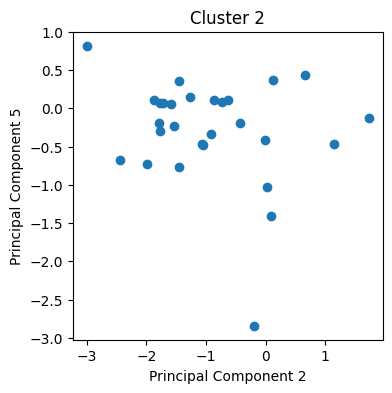

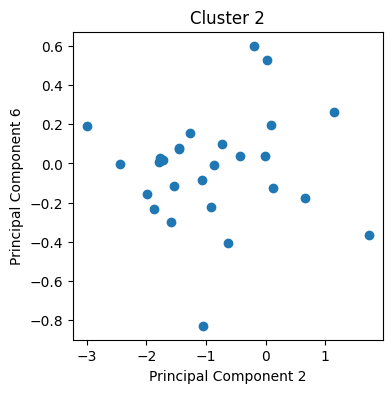

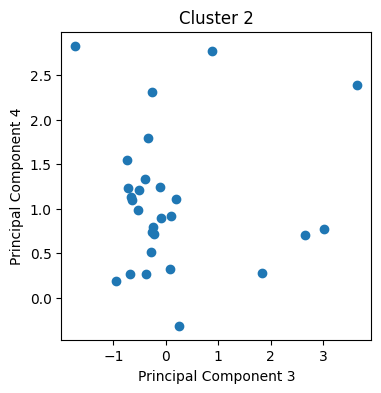

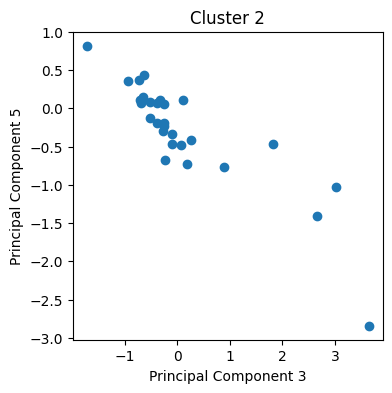

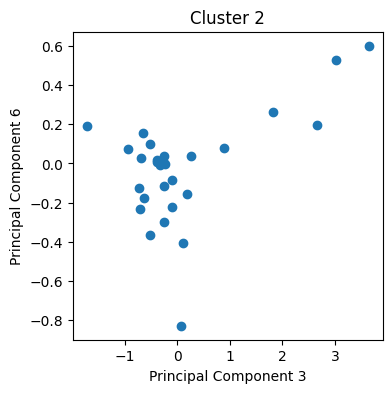

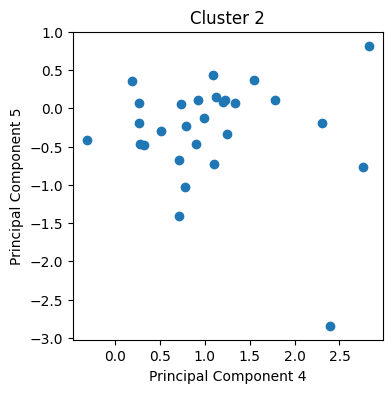

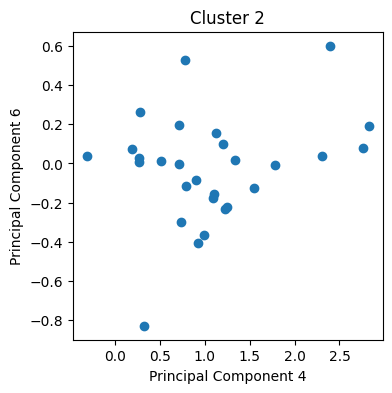

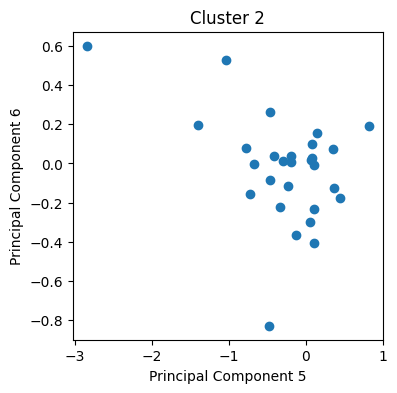

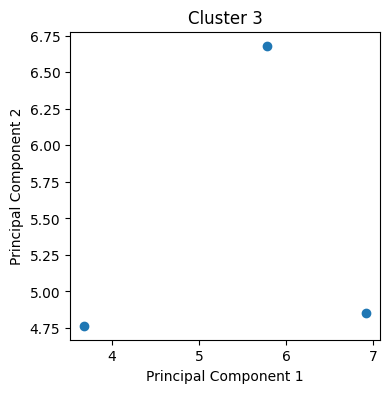

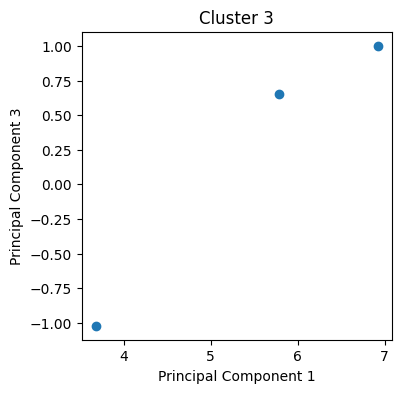

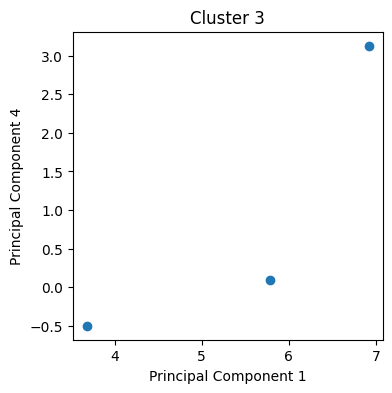

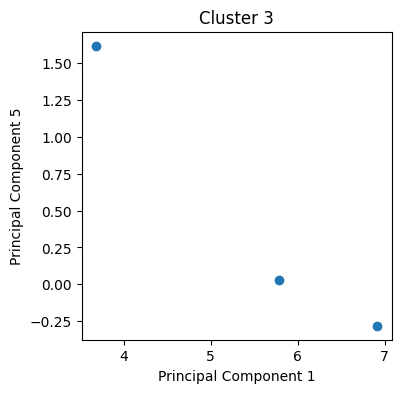

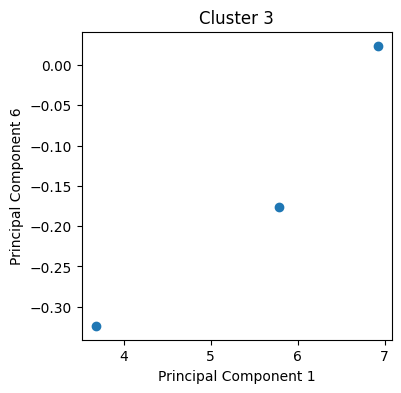

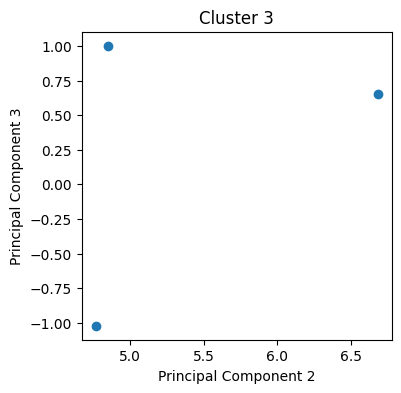

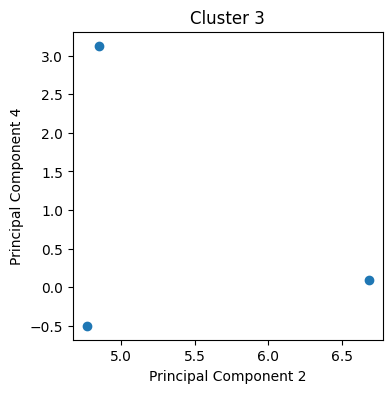

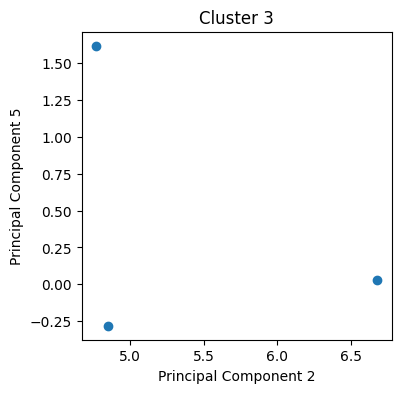

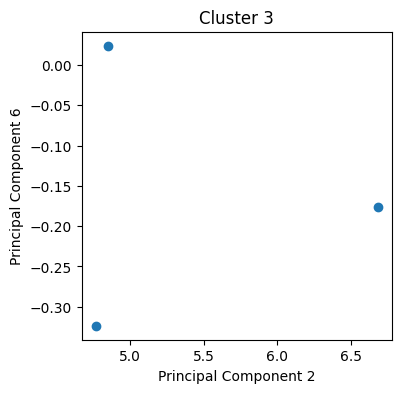

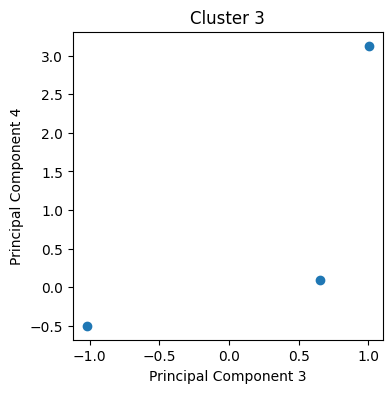

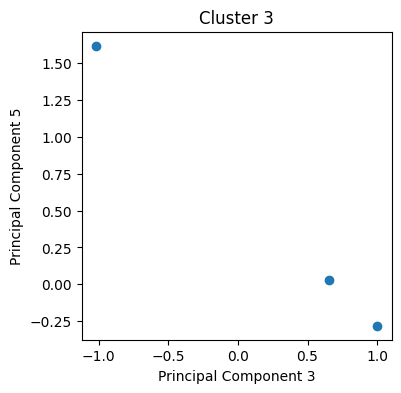

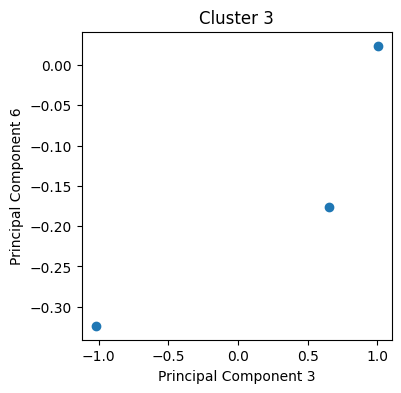

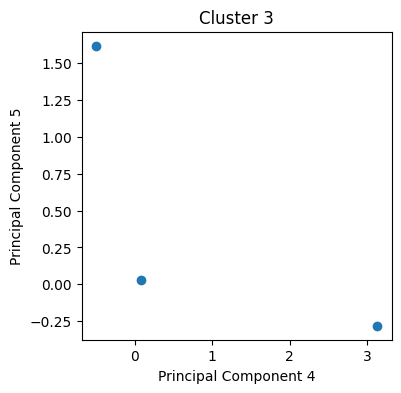

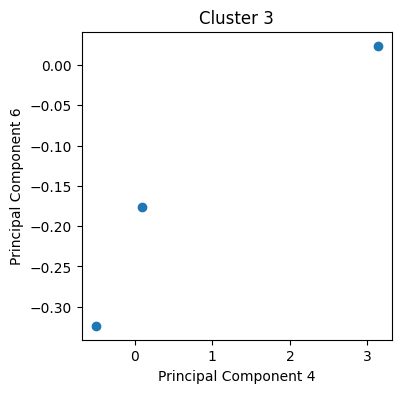

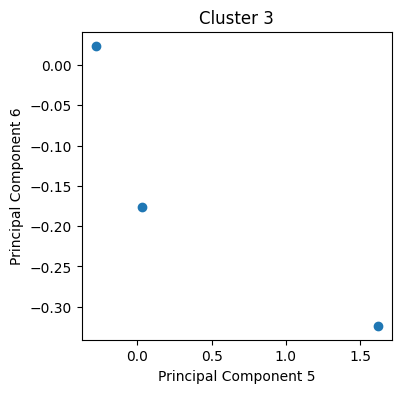

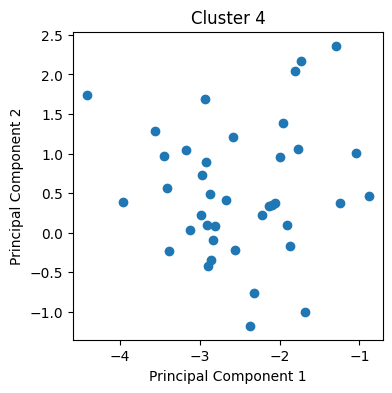

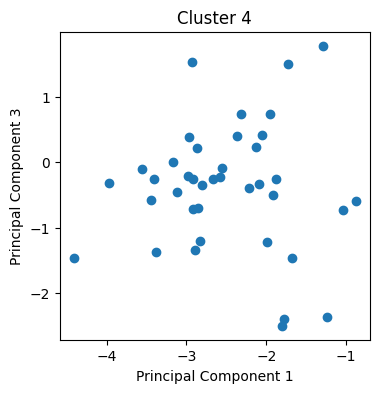

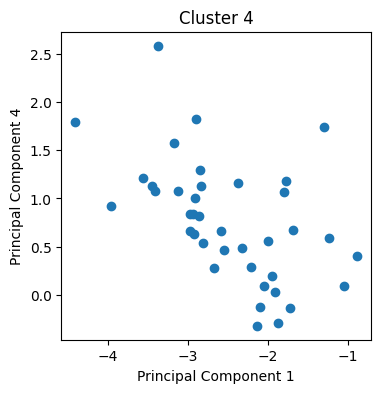

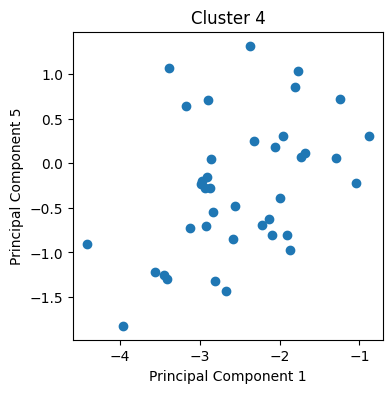

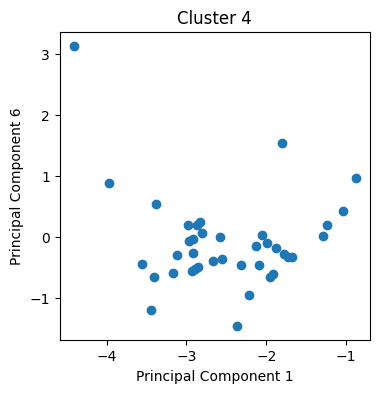

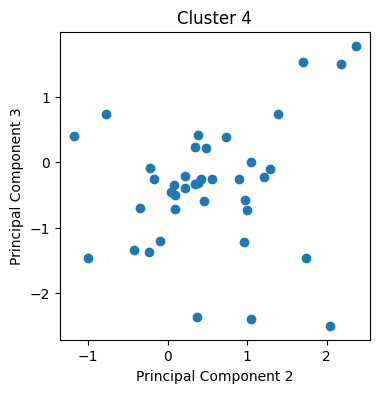

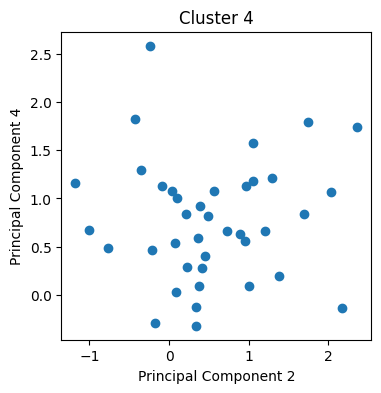

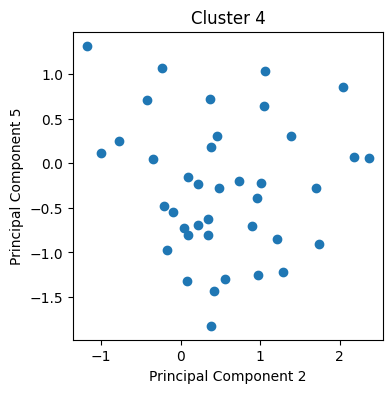

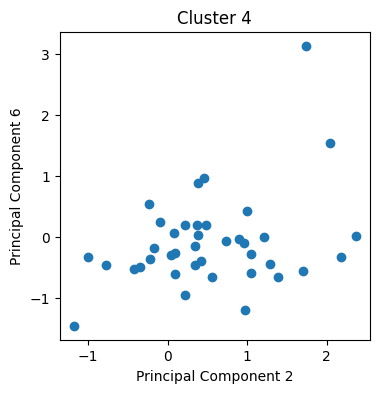

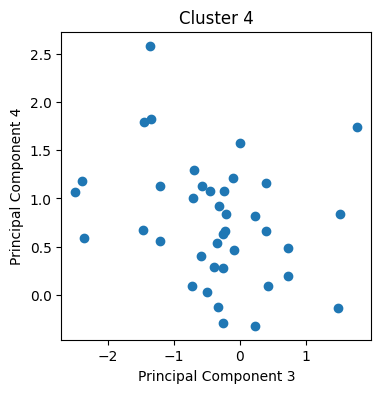

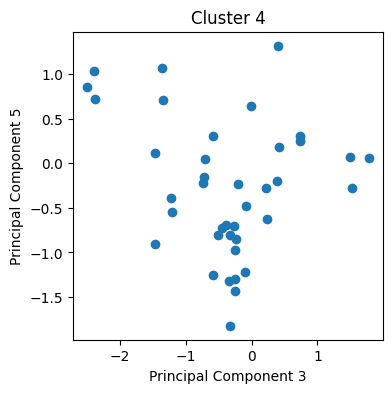

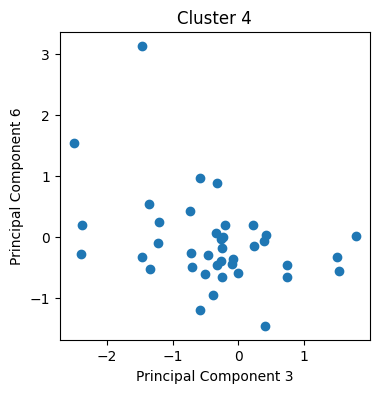

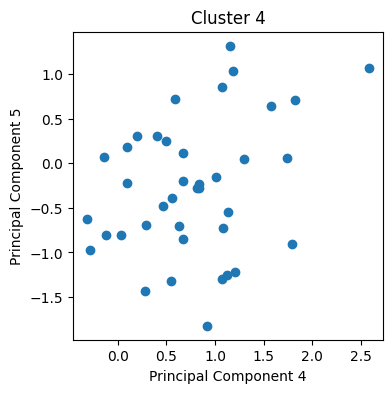

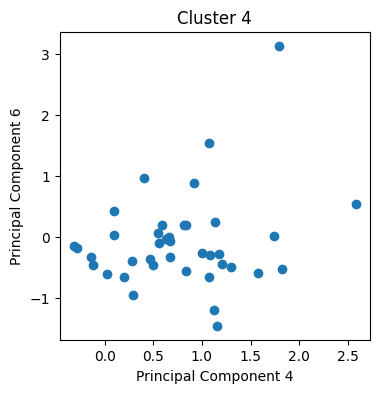

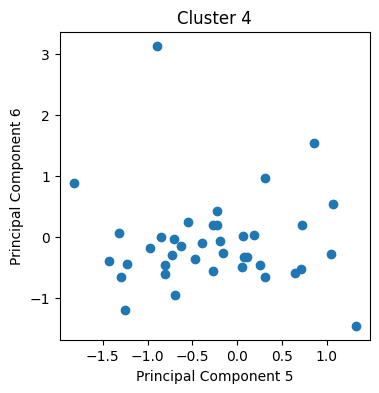

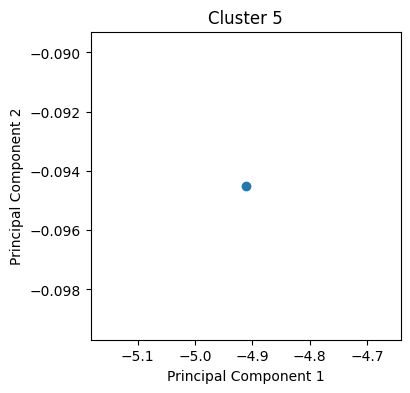

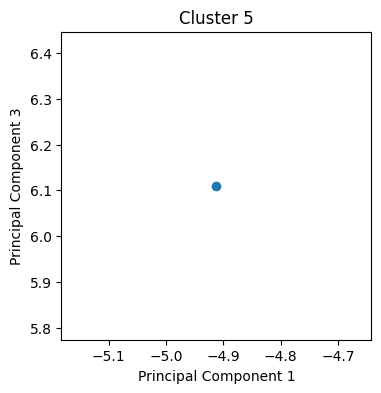

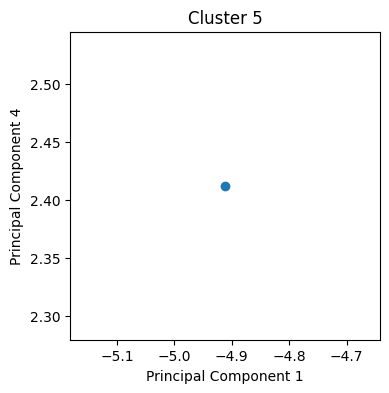

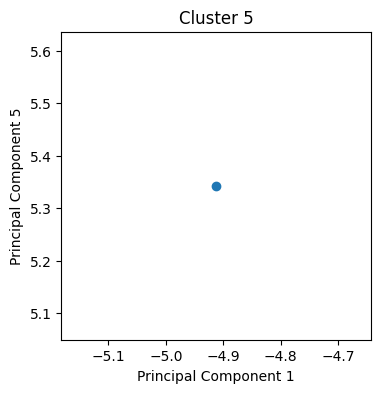

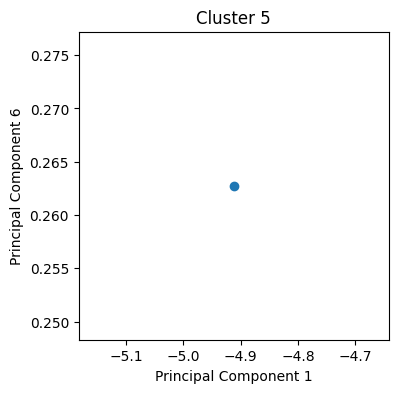

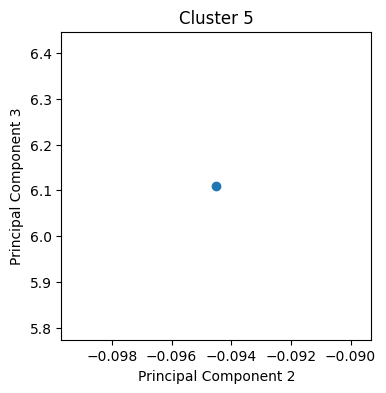

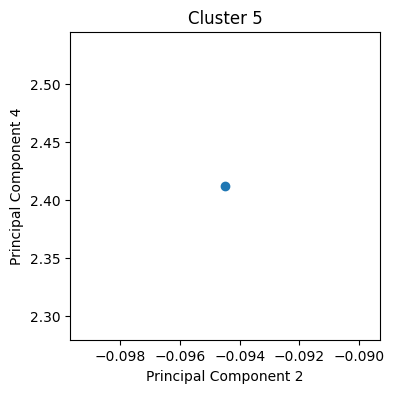

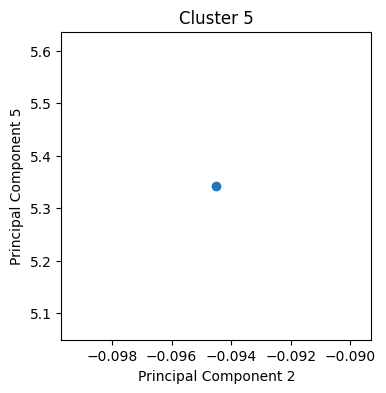

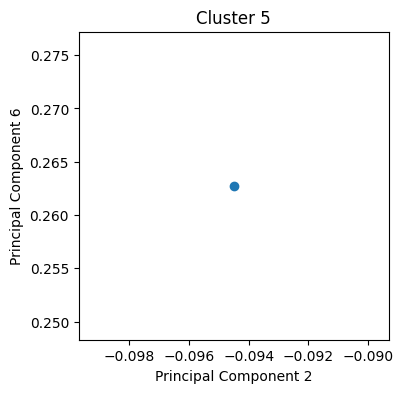

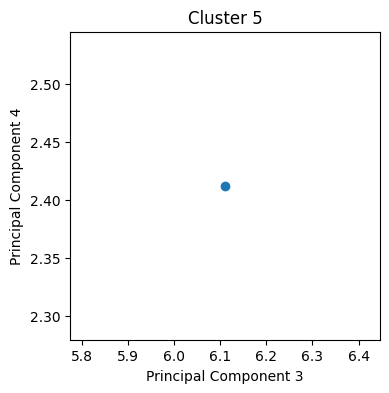

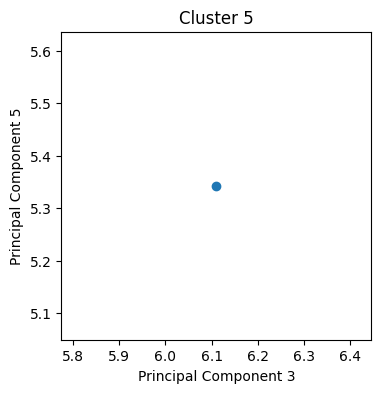

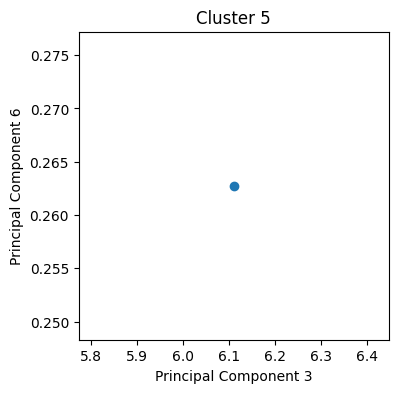

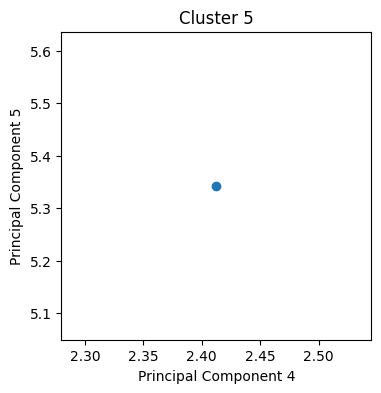

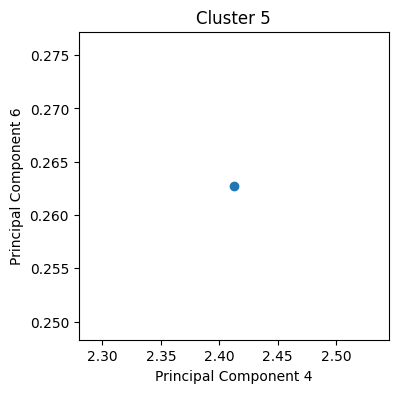

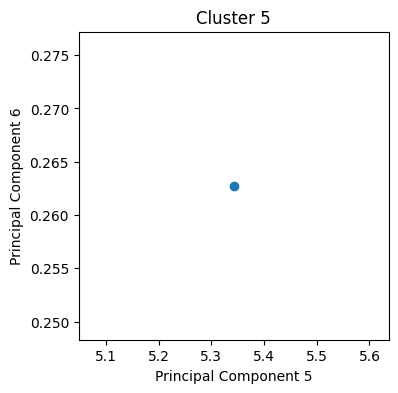

In [242]:
for i in range(optimal_k):
    cluster_data = data_pca[kmeans.labels_ == i]
    
    # Create a scatter plot for each pair of principal components
    for j in range(n_components_required-1):
        for k in range(j+1, n_components_required):
            plt.figure(figsize=(4, 4))
            plt.scatter(cluster_data[:, j], cluster_data[:, k])
            plt.title(f'Cluster {i}')
            plt.xlabel(f'Principal Component {j+1}')
            plt.ylabel(f'Principal Component {k+1}')
            plt.show()


* <h3> Print the descriptive statistics for each cluster</h3>

In [243]:
for i in range(optimal_k):
    print(f"Cluster {i}:")
    print(d[kmeans.labels_ == i].describe())

Cluster 0:
       child_mort    exports     health    imports        income  inflation  \
count   38.000000  38.000000  38.000000  38.000000     38.000000  38.000000   
mean    34.997368  26.886289   5.191053  29.749103  10488.684211  13.085526   
std     19.935836  13.172140   1.806726  12.950903   8093.708658   8.892928   
min     10.000000   0.109000   1.970000   0.065900   1420.000000   3.680000   
25%     18.725000  19.075000   4.200000  21.275000   4605.000000   7.065000   
50%     30.500000  26.050000   5.070000  27.250000   8955.000000  10.500000   
75%     48.800000  34.025000   5.955000  34.375000  14100.000000  16.400000   
max     92.100000  57.700000   9.010000  60.300000  45400.000000  45.900000   

       life_expec  total_fer          gdpp  
count   38.000000  38.000000     38.000000  
mean    70.531579   2.768947   4931.789474  
std      5.099237   0.828671   4221.483787  
min     54.300000   1.570000    482.000000  
25%     67.700000   2.232500   1530.000000  
50%    

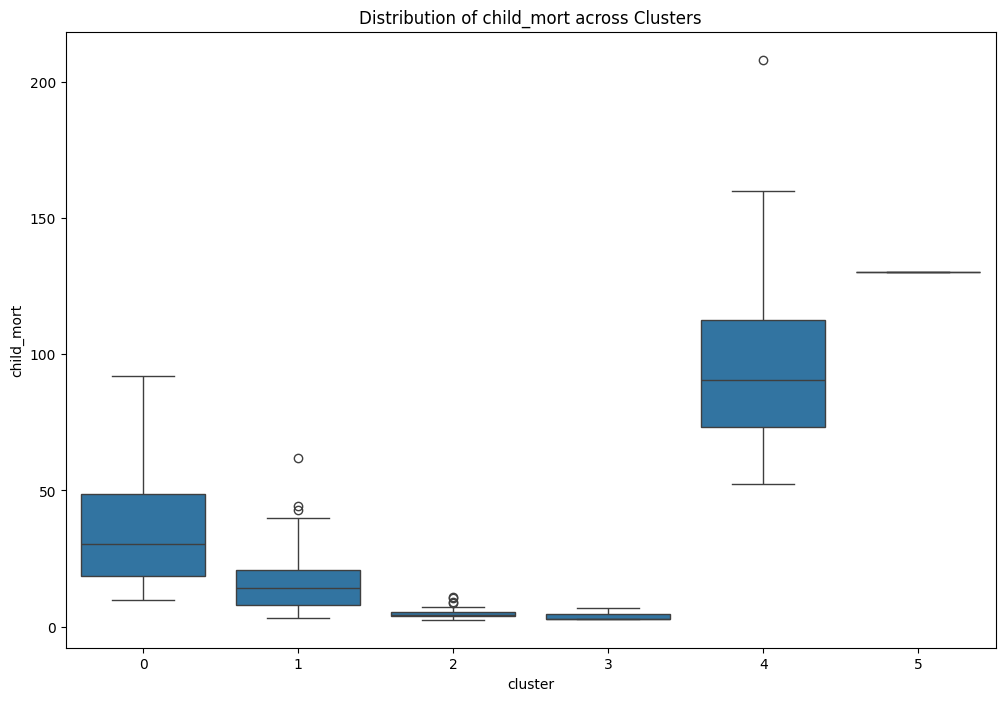

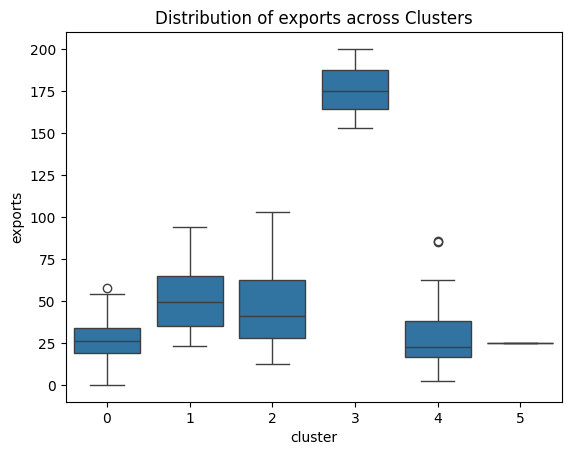

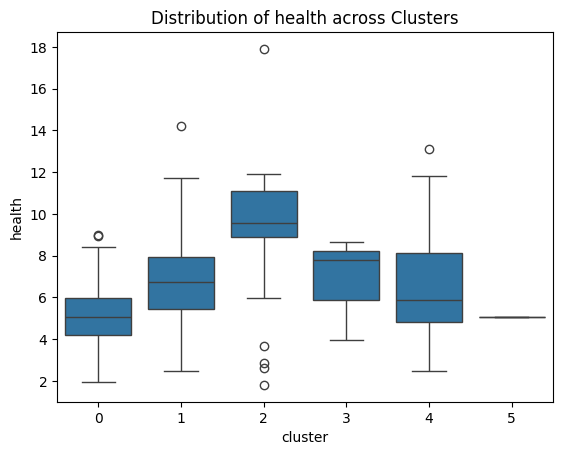

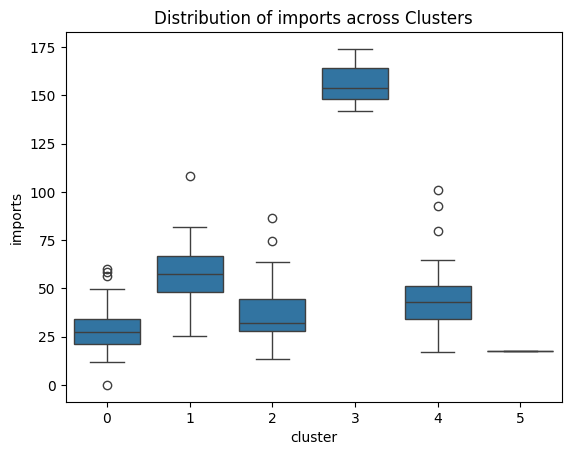

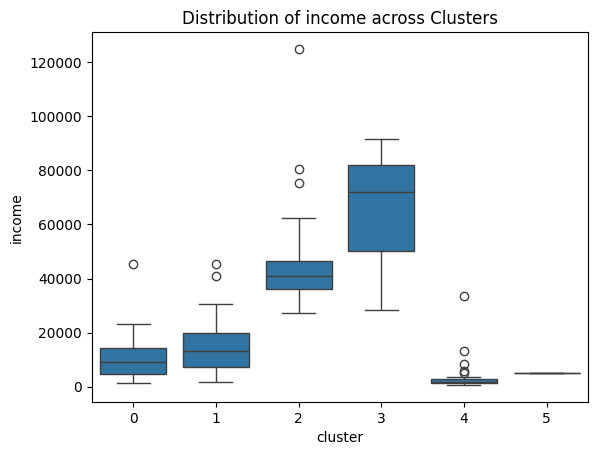

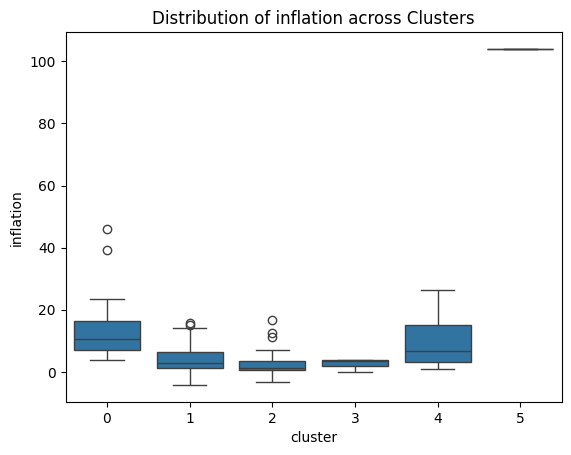

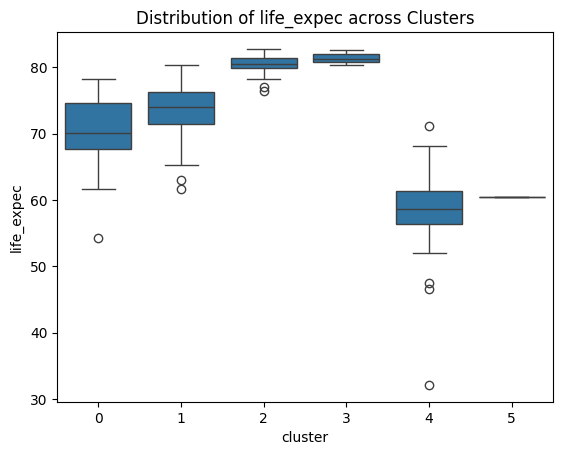

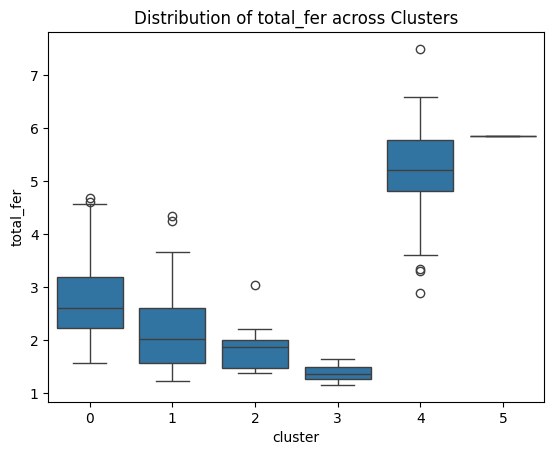

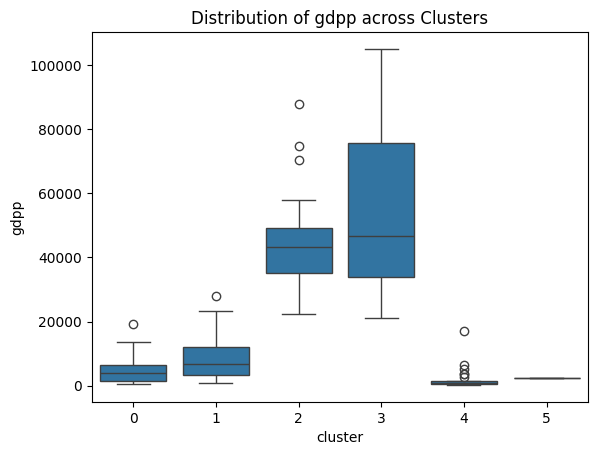

         child_mort     exports    health     imports        income  \
cluster                                                               
0         34.997368   26.886289  5.191053   29.749103  10488.684211   
1         16.812069   49.891379  6.844138   58.013793  14535.517241   
2          5.046429   45.039286  9.240000   38.678571  46371.428571   
3          4.133333  176.000000  6.793333  156.666667  64033.333333   
4         97.497436   29.113333  6.662308   45.256410   3227.769231   
5        130.000000   25.300000  5.070000   17.400000   5150.000000   

          inflation  life_expec  total_fer          gdpp  
cluster                                                   
0         13.085526   70.531579   2.768947   4931.789474  
1          4.219724   73.577586   2.138276   8354.413793  
2          2.860464   80.417857   1.823571  44803.571429  
3          2.468000   81.433333   1.380000  57566.666667  
4          9.386538   58.425641   5.180256   1628.717949  
5        104.00000

In [244]:
# Assign cluster labels to the original data
df['cluster'] = kmeans.labels_
da=df.drop(['country'],axis=1)
# Explore cluster characteristics
cluster_means = da.groupby('cluster').mean()

# Visualize feature distributions across clusters
plt.figure(figsize=(12, 8))
for feature in da.columns[:-1]:  # Exclude 'cluster' and 'target' columns
    sns.boxplot(x='cluster', y=feature, data=df)
    plt.title(f'Distribution of {feature} across Clusters')
    plt.show()

# Interpret the clusters based on feature means or medians
print(cluster_means)
